C:\Users\Vishrut\AppData\Local\Temp\ipykernel_13352\1438974017.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Sales_Month,Total_Sales,Previous_Month_Sales,MoM_Growth_Percentage,Moving_Avg_3,Sales_Rank,Running_Total
2024-01,2120.0,NaN,NaN,2120.00,7,2120.0
2024-02,2710.0,2120.0,27.83,2415.00,6,4830.0
2024-03,3450.0,2710.0,27.31,2760.00,5,8280.0
2024-04,3960.0,3450.0,14.78,3373.33,4,12240.0
2024-05,4420.0,3960.0,11.62,3943.33,3,16660.0
2024-06,4900.0,4420.0,10.86,4426.67,2,21560.0
2024-07,5290.0,4900.0,7.96,4870.00,1,26850.0


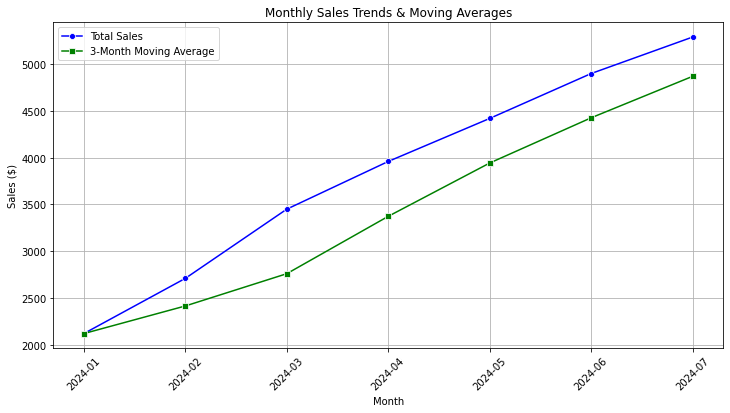

In [6]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

# Connect to MySQL Database
conn = mysql.connector.connect(
    host="localhost",  # Change to your database host
    user="root",  # Change to your username
    password="durga",  # Change to your password
    database="challenge"
)

# SQL Query to Fetch Monthly Sales Trends
query = """
WITH MonthlySales AS (
    SELECT 
        DATE_FORMAT(Purchase_Date, '%Y-%m') AS Sales_Month,
        SUM(Amount) AS Total_Sales,
        LAG(SUM(Amount)) OVER (ORDER BY DATE_FORMAT(Purchase_Date, '%Y-%m')) AS Previous_Month_Sales,
        ROUND(AVG(SUM(Amount)) OVER (ORDER BY DATE_FORMAT(Purchase_Date, '%Y-%m') ROWS BETWEEN 2 PRECEDING AND CURRENT ROW), 2) AS Moving_Avg_3,
        DENSE_RANK() OVER (ORDER BY SUM(Amount) DESC) AS Sales_Rank
    FROM Sales
    GROUP BY Sales_Month
)
SELECT 
    Sales_Month,
    Total_Sales,
    Previous_Month_Sales,
    ROUND(((Total_Sales - Previous_Month_Sales) / Previous_Month_Sales) * 100, 2) AS MoM_Growth_Percentage,
    Moving_Avg_3,
    Sales_Rank,
    SUM(Total_Sales) OVER (ORDER BY Sales_Month ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS Running_Total
FROM MonthlySales
ORDER BY Sales_Month;
"""

# Fetch Data from MySQL
df = pd.read_sql(query, conn)
conn.close()

# Display Data
display(HTML(df.to_html(index=False)))

# Plot Monthly Sales Trends
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Sales_Month", y="Total_Sales", marker="o", label="Total Sales", color="b")
sns.lineplot(data=df, x="Sales_Month", y="Moving_Avg_3", marker="s", label="3-Month Moving Average", color="g")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("Monthly Sales Trends & Moving Averages")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Save and Show the Visualization
plt.savefig("SQL_Sales_Trend_Analysis.png", dpi=300, bbox_inches='tight')
plt.show()
